<a href="https://colab.research.google.com/github/Vinnize/itban5-activities/blob/main/Laboratory_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.
Using the Colab notebook, import the following packages/ libraries/ modules:

- OS

- Numpy

- Pandas

- Matplotlib

- Seaborn

- Warnings (to suppress warnings)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive

#mount google drive
drive.mount('/content/drive')

#file path
file_path = '/content/drive/MyDrive/loans.csv'


Mounted at /content/drive


2. Import and load the dataset. Set the client_id as the index.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/loans.csv')
df.set_index('client_id', inplace=True)

3. Display the contents of the dataset by showing its first 5 rows.

In [3]:
print(df.head())

          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   

           rate  
client_id        
46109      2.15  
46109      1.25  
46109      0.68  
46109      1.24  
46109      3.13  


4. Check the info of the dataset and the datatypes for each columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


5. Determine whether the dataset has missing values.

In [5]:
missing_values = df.isnull().sum()
print(missing_values)


loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


6. Check if there is a presence of outliers using Boxplot.

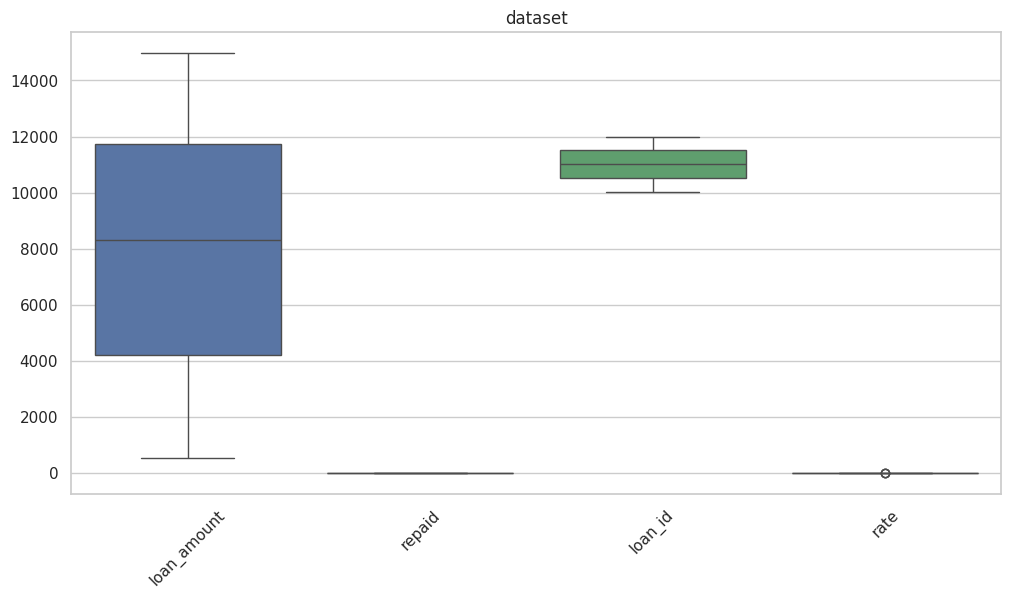

In [6]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot for all numerical columns in the DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('dataset')
plt.show()


7. If there are a presence of outliers, do the following and explain the results:

	a. Treat them using SQRT transformation

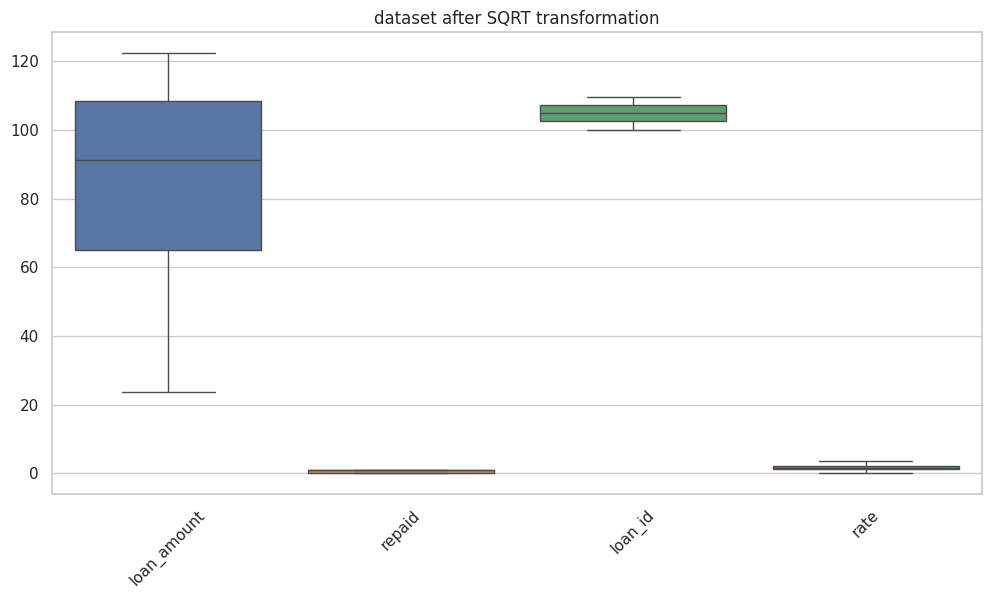

In [7]:
# Apply SQRT transformation to numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Exclude columns with constant values (as SQRT transformation won't change them)
numerical_columns = [col for col in numerical_columns if df[col].nunique() > 1]

# Apply SQRT transformation to non-constant numerical columns
df_sqrt = df.copy()
df_sqrt[numerical_columns] = df_sqrt[numerical_columns].apply(lambda x: np.sqrt(x))

# Plot boxplots after SQRT transformation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sqrt)
plt.xticks(rotation=45)
plt.title('dataset after SQRT transformation')
plt.show()


b. Treat them using the capping approach: Z-Score.


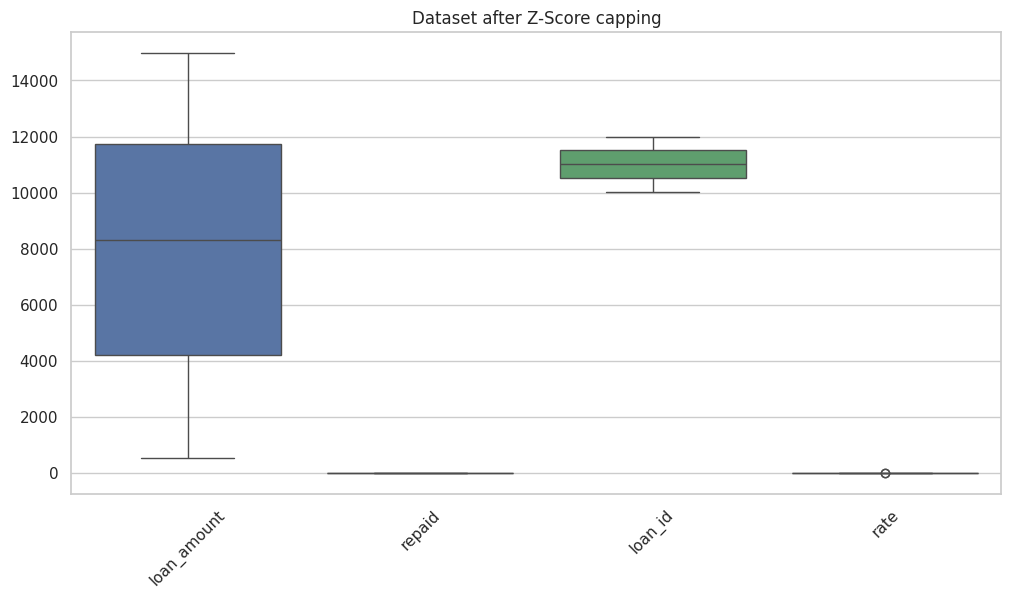

In [8]:
from scipy import stats

# Define a function to cap outliers using Z-Score
def cap_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    outlier_mask = (z_scores > threshold)
    df_capped = df.copy()
    df_capped[outlier_mask] = np.nan  # Replace outliers with NaN
    return df_capped

# Apply Z-Score capping to numerical columns
df_capped = cap_outliers_zscore(df)

# Forward fill NaN values to maintain data continuity
df_capped = df_capped.fillna(method='ffill')

# Plot boxplots after Z-Score capping
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_capped)
plt.xticks(rotation=45)
plt.title('Dataset after Z-Score capping')
plt.show()


8.  Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.

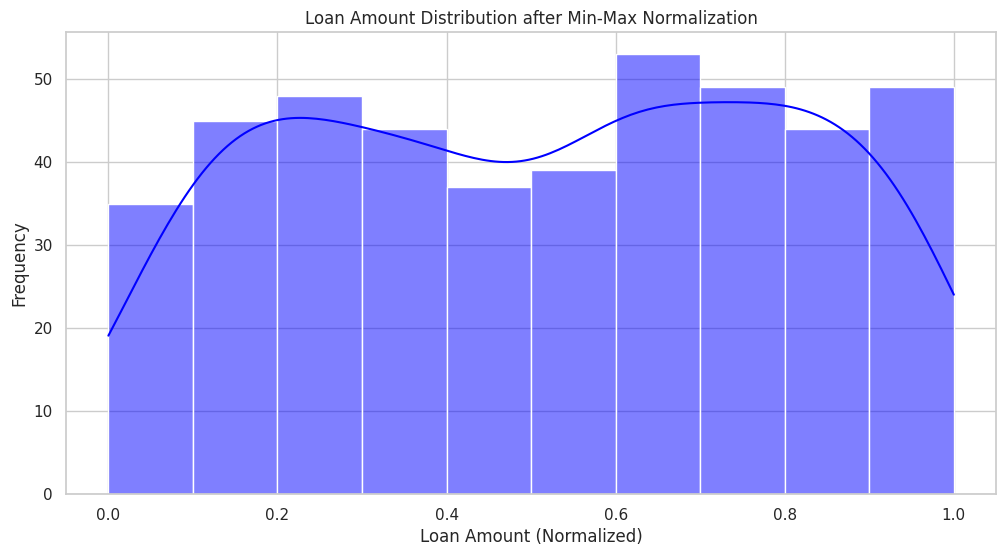

Skewness: -0.04011522267119749
Kurtosis: -1.2320989495947452


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Normalization to numerical columns
scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include=np.number).columns
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df_normalized[numerical_columns])

# Display skewness and kurtosis graphs for the loan amount
plt.figure(figsize=(12, 6))
sns.histplot(df_normalized['loan_amount'], kde=True, color='blue')
plt.title('Loan Amount Distribution after Min-Max Normalization')
plt.xlabel('Loan Amount (Normalized)')
plt.ylabel('Frequency')
plt.show()

print("Skewness:", df_normalized['loan_amount'].skew())
print("Kurtosis:", df_normalized['loan_amount'].kurtosis())


9.  As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [10]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding using pd.get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first five rows
print(df_encoded.head())


           loan_amount  repaid  loan_id  rate  loan_type_cash  \
client_id                                                       
46109            13672       0    10243  2.15               0   
46109             9794       0    10984  1.25               0   
46109            12734       1    10990  0.68               0   
46109            12518       1    10596  1.24               1   
46109            14049       1    11415  3.13               0   

           loan_type_credit  loan_type_home  loan_type_other  \
client_id                                                      
46109                     0               1                0   
46109                     1               0                0   
46109                     0               1                0   
46109                     0               0                0   
46109                     1               0                0   

           loan_start_2000-01-26  loan_start_2000-03-06  ...  \
client_id                      

10. Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [11]:
# Convert 'loan_start' and 'loan_end' columns to datetime type if they are not already
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

# Calculate tenure of the loan
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days

# Display the first five rows with the new derived feature
print(df.head())


          loan_type  loan_amount  repaid  loan_id loan_start   loan_end  rate  \
client_id                                                                       
46109          home        13672       0    10243 2002-04-16 2003-12-20  2.15   
46109        credit         9794       0    10984 2003-10-21 2005-07-17  1.25   
46109          home        12734       1    10990 2006-02-01 2007-07-05  0.68   
46109          cash        12518       1    10596 2010-12-08 2013-05-05  1.24   
46109        credit        14049       1    11415 2010-07-07 2012-05-21  3.13   

           loan_tenure  
client_id               
46109              613  
46109              635  
46109              519  
46109              879  
46109              684  


11. Split the data into training and test sets with 80-20 division.

In [12]:
from sklearn.model_selection import train_test_split

# Assuming 'loan_amount' represents the target variable that you want to predict
loan_amount = 'loan_amount'

# Check the column names to ensure the correct target variable name
print("Column Names:", df.columns)

# Separate features (X) and target variable (y)
X = df.drop(columns=[loan_amount])  # Features
y = df[loan_amount]  # Target variable

# Split the data into training and test sets (80-20 division)
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Column Names: Index(['loan_type', 'loan_amount', 'repaid', 'loan_id', 'loan_start',
       'loan_end', 'rate', 'loan_tenure'],
      dtype='object')
Training set shape: (354, 7) (354,)
Test set shape: (89, 7) (89,)
